In [1]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Initialize the encoder
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

# Function to load images from a directory and process them
def load_images_from_folder(folder, label):
    data = []
    result = []
    for r, d, f in os.walk(folder):
        for file in f:
            if '.jpg' in file:
                img_path = os.path.join(r, file)
                img = Image.open(img_path)
                img = img.resize((128, 128))
                img = np.array(img)
                if img.shape == (128, 128, 3):
                    data.append(img)
                    result.append(encoder.transform([[label]]).toarray())
    return data, result

# Load images with tumors
data_yes, result_yes = load_images_from_folder(r"C:\Users\Bala Bhanu Prakash\Downloads\archive (7)\yes", 0)

# Load images without tumors
data_no, result_no = load_images_from_folder(r"C:\Users\Bala Bhanu Prakash\Downloads\archive (7)\no", 1)

# Combine the data and results
data = data_yes + data_no
result = result_yes + result_no

# Flatten result list
result = [r[0] for r in result]


In [3]:
data = np.array(data)
result = np.array(result)

In [4]:
data.shape

(2891, 128, 128, 3)

In [5]:
result.shape

(2891, 2)

In [6]:
print(f'Total number of images we have: {len(data)}')

Total number of images we have: 2891


In [7]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [8]:
print(f'Number of images in training data: {len(x_train)}')

Number of images in training data: 2312


In [9]:
print(f'Number of images in testing data: {len(x_test)}')

Number of images in testing data: 579


In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

C:\Users\Bala Bhanu Prakash\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [14]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model
history = model.fit(
    x_train, 
    y_train, 
    epochs=30, 
    batch_size=40, 
    steps_per_epoch=3,  
    verbose=1, 
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]  # Adding early stopping callback
)


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - loss: 0.2012 - val_loss: 0.2627
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - loss: 0.2112 - val_loss: 0.2569
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - loss: 0.1087 - val_loss: 0.2573
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - loss: 0.0864 - val_loss: 0.2652
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - loss: 0.1468 - val_loss: 0.2706
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - loss: 0.0752 - val_loss: 0.2776
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - loss: 0.0953 - val_loss: 0.2943


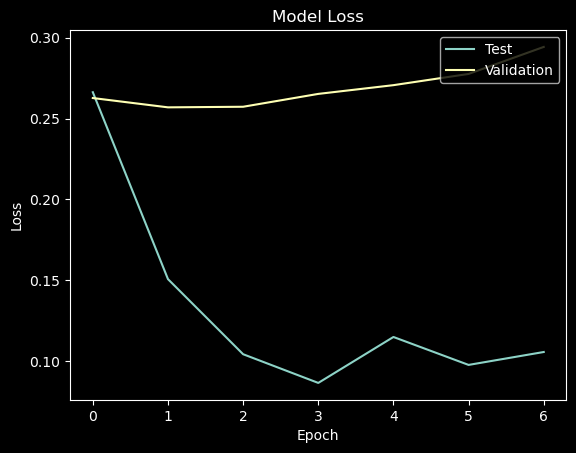

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [16]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

99.81837868690491% Confidence This Is No, Its not a tumor


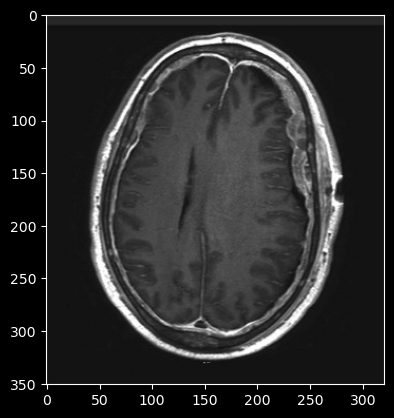

In [17]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\Bala Bhanu Prakash\Downloads\archive (7)\pred\pred26.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

98.58471751213074% Confidence This Is Its a Tumor


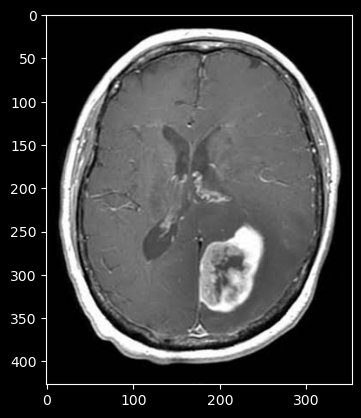

In [18]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\Bala Bhanu Prakash\Downloads\archive (7)\pred\pred14.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [19]:
#@title Provide a title for your app:
heading_title = "Tumor Classification App" 

In [21]:
desc = "Brain tumor app. Let's learn!" # @param {type:"string"}
long_desc = "Select an image or upload one to predict if brain tumor is present or not" # @param {type:"string"}

In [22]:
import gradio as gr

#@title Select a Theme for Gradio Interface:
theme_selection = "Glass" # @param ["Base", "Default", "Glass", "Monochrome", "Soft"]

theme_dict = {
    "Base": gr.themes.Base(),
    "Default": gr.themes.Default(),
    "Glass": gr.themes.Glass(),
    "Monochrome": gr.themes.Monochrome(),
    "Soft": gr.themes.Soft()
}

# The selected theme is determined by the user's dropdown selection
selected_theme = theme_dict[theme_selection]

In [23]:
def recognize_image(image):
    # Resize the image to the expected dimensions
    img = Image.fromarray(image).resize((128, 128))
    # Convert the image to a NumPy array
    x = np.array(img)
    # Reshape the image to match the model input
    x = x.reshape(1, 128, 128, 3)

    # Make a prediction
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]

    # Map the class index to the actual class name (assuming you have a list of class names)
    class_names = ['No Tumor', 'Tumor']  # Example class names, update according to your model
    result = f"{names(classification)}"

    return result

In [ ]:
# Update the import for components
image = gr.Image()
label = gr.Label()

# Create the interface with the updated component imports
iface = gr.Interface(
    fn=recognize_image,
    inputs=image,
    outputs=label,
    title=heading_title,
    description=desc,
    article=long_desc,
    theme=selected_theme  # Make sure this is defined based on user selection as explained in previous messages
)

iface.launch(share=True, debug=True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
